In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from pathlib import Path
import os
%matplotlib inline

In [2]:
# Variables used throughout the notebook
project_root_dir = Path(os.path.abspath('')).resolve().parents[0]
current_notebook = "InitialDataExploration"

# output path for images
image_folder_path = os.path.join(project_root_dir, "notebooks", current_notebook)
os.makedirs(image_folder_path, exist_ok=True)

# output path for data
data_folder_path = os.path.join(project_root_dir, "data", "interim")

In [3]:
# matplotlib variable 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Pandas variable to display a complete dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data
### Validate the data

In [10]:
# Read the raw data from the CSV file
# raw data are in data/raw/leaf-classification
leaf_dataset = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [12]:
# Print only the header of the data
print(leaf_dataset.columns.values)
print(len(leaf_dataset.columns.values))

['id' 'species' 'margin1' 'margin2' 'margin3' 'margin4' 'margin5'
 'margin6' 'margin7' 'margin8' 'margin9' 'margin10' 'margin11' 'margin12'
 'margin13' 'margin14' 'margin15' 'margin16' 'margin17' 'margin18'
 'margin19' 'margin20' 'margin21' 'margin22' 'margin23' 'margin24'
 'margin25' 'margin26' 'margin27' 'margin28' 'margin29' 'margin30'
 'margin31' 'margin32' 'margin33' 'margin34' 'margin35' 'margin36'
 'margin37' 'margin38' 'margin39' 'margin40' 'margin41' 'margin42'
 'margin43' 'margin44' 'margin45' 'margin46' 'margin47' 'margin48'
 'margin49' 'margin50' 'margin51' 'margin52' 'margin53' 'margin54'
 'margin55' 'margin56' 'margin57' 'margin58' 'margin59' 'margin60'
 'margin61' 'margin62' 'margin63' 'margin64' 'shape1' 'shape2' 'shape3'
 'shape4' 'shape5' 'shape6' 'shape7' 'shape8' 'shape9' 'shape10' 'shape11'
 'shape12' 'shape13' 'shape14' 'shape15' 'shape16' 'shape17' 'shape18'
 'shape19' 'shape20' 'shape21' 'shape22' 'shape23' 'shape24' 'shape25'
 'shape26' 'shape27' 'shape28' 'sha

In [7]:
# The id column will not be used so we drop it (Usefull only for the kaggle competition test set)
leaf_dataset = leaf_dataset.drop(['id'], axis=1)

In [8]:
# Print few row of the dataset to see what is inside
leaf_dataset.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.000720,0

In [9]:
# The species is a string, so we need to encode it
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(leaf_dataset.species)
leaf_dataset.species = le.transform(leaf_dataset.species)

In [10]:
# Validate that all column contains numerical values
print(leaf_dataset.dtypes)

# Validate that there isn't any NaN value
leaf_dataset.describe()

species        int32
margin1      float64
margin2      float64
margin3      float64
margin4      float64
margin5      float64
margin6      float64
margin7      float64
margin8      float64
margin9      float64
margin10     float64
margin11     float64
margin12     float64
margin13     float64
margin14     float64
margin15     float64
margin16     float64
margin17     float64
margin18     float64
margin19     float64
margin20     float64
margin21     float64
margin22     float64
margin23     float64
margin24     float64
margin25     float64
margin26     float64
margin27     float64
margin28     float64
margin29     float64
margin30     float64
margin31     float64
margin32     float64
margin33     float64
margin34     float64
margin35     float64
margin36     float64
margin37     float64
margin38     float64
margin39     float64
margin40     float64
margin41     float64
margin42     float64
margin43     float64
margin44     float64
margin45     float64
margin46     float64
margin47     

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,49.000000,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.000110,0.

### Split the data
The original kaggle dataset contains a train and a test folder. The test folder is only useful on the kaggle platform itself because it doesn't contain any labels. That's why we will split the train data into a training set and a test set.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
# Use a stratified shuffle split to split the train data in 2 sets with a ration of 80%-20%

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(leaf_dataset, leaf_dataset.species):
    train_set, test_set = leaf_dataset.loc[train_index], leaf_dataset.loc[test_index]

### Save the data

In [12]:
train_data_path = os.path.join(data_folder_path, "train.csv")
test_data_path = os.path.join(data_folder_path, "test.csv")

train_set.to_csv(train_data_path, index=False)
test_set.to_csv(test_data_path, index=False)

### Data exploration

In [13]:
train_set = pd.read_csv("../data/interim/train.csv")

In [14]:
labels = train_set.species
train_set = train_set.drop(['species'], axis=1)

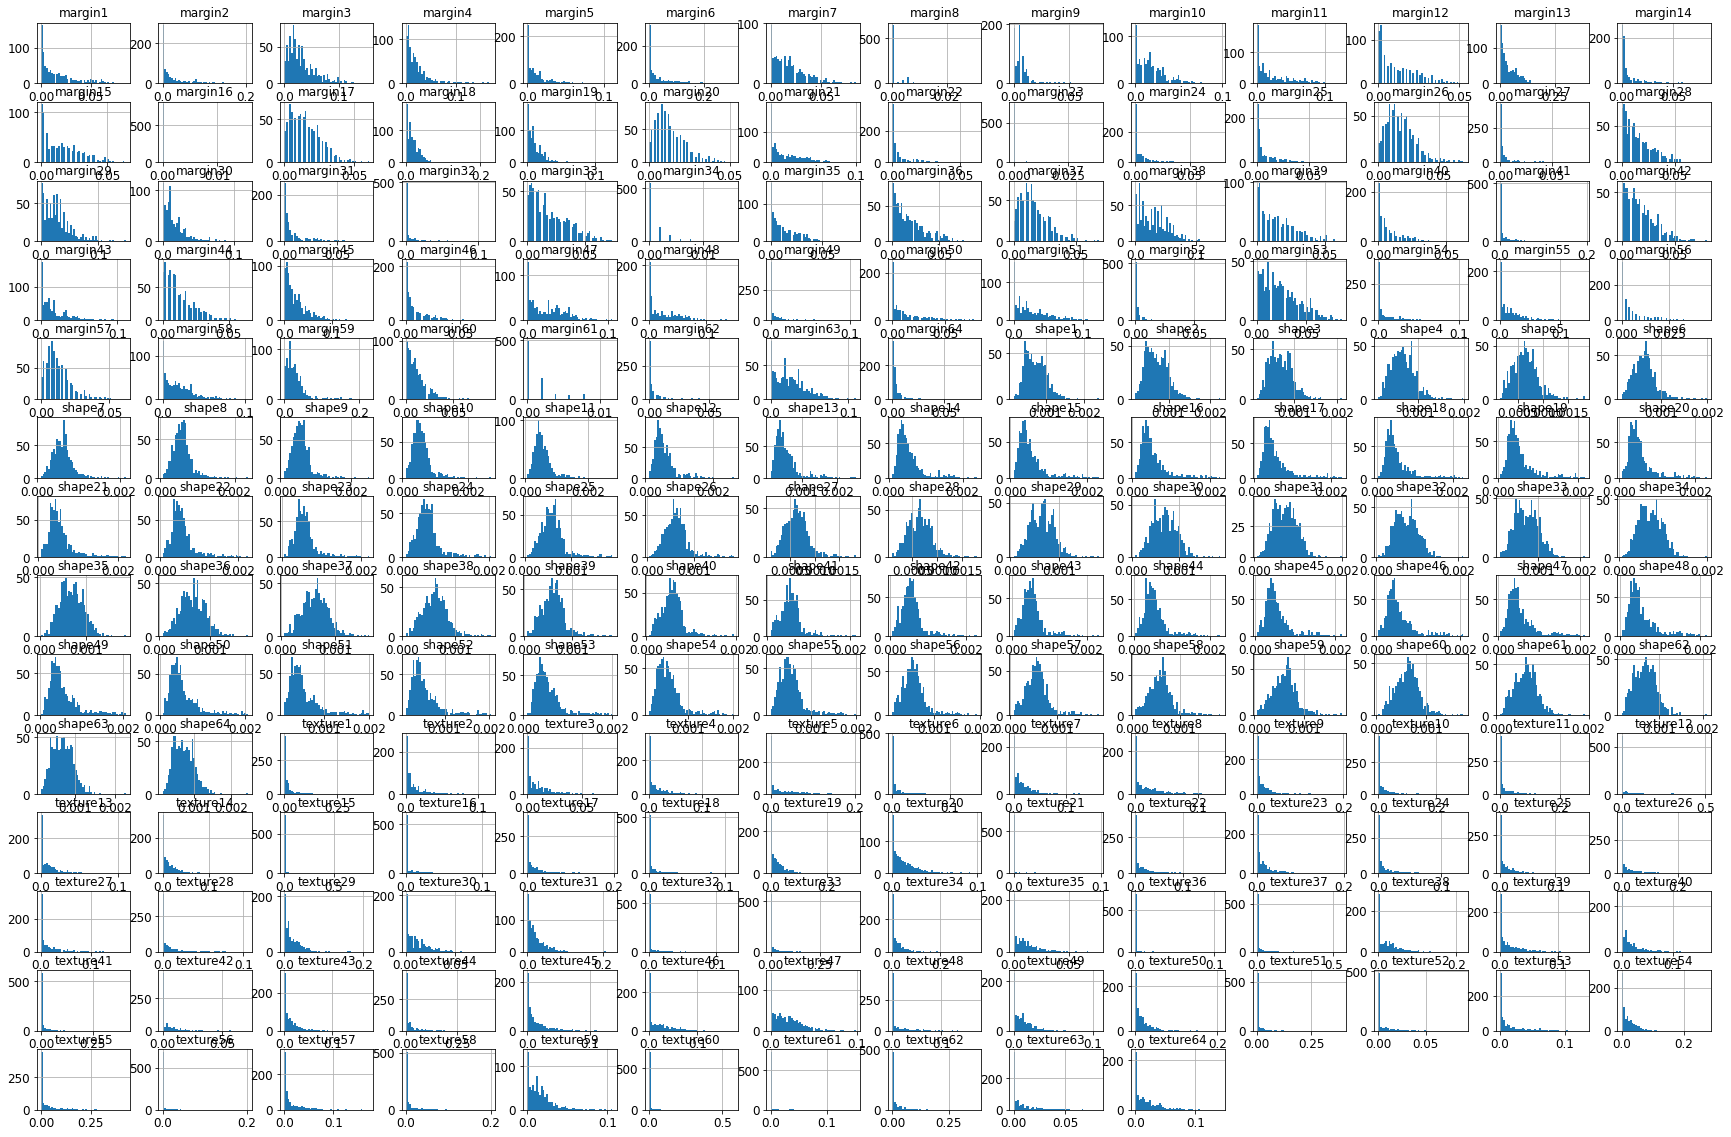

In [15]:
train_set.hist(bins=50, figsize=(30,20))
plt.show()

In [16]:
train_set.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,0.017386,0.028806,0.032204,0.023021,0.014086,0.038478,0.019201,0.001117,0.007198,0.018446,0.024387,0.012182,0.041065,0.008032,0.015677,0.000126,0.015270,0.020229,0.012246,0.01

From the histrogram and the description we notice several things:
1- All the data have a similar scale, ranging from 0 to 0.8.
2- Most of the features are tail-heavy.
3- Several features are almost 0 for every sample.

In [17]:
# Explore the correlation between each features
corr_matrix = train_set.corr()

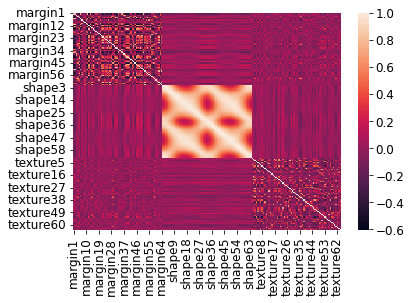

In [18]:
sns.heatmap(corr_matrix)
figure_path = os.path.join(image_folder_path, 'correlation_matrix.png')
# plt.savefig(figure_path, bbox_inches='tight', pad_inches=0.0
plt.savefig(figure_path)

From the correlation matrix, we see several things:
1- There is a very high positive correlation inside the shape features.
2- There isn't any correlation between feature group (margin, shape, texture).
3- There is positive and negative correlation inside the margin features.
4- There is positive and negative correlation inside the texture features.

We might want several features in each group to reduce the number of attribrute. 

<AxesSubplot:>

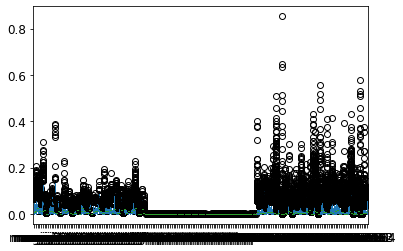

In [19]:
train_set.boxplot(grid=False)

From the box plot, we can see that the shape feature doesn't have the same range as the margin features or texture features. 
We also see that margin feature and texture feature seems to have outliers. 

<AxesSubplot:>

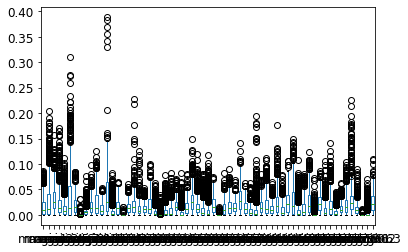

In [20]:
# Extract only margin feature
margin_df = train_set.iloc[:, 0:63]
margin_df.boxplot(grid=False)

<AxesSubplot:>

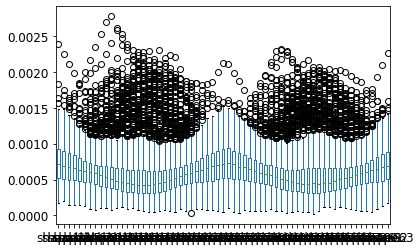

In [21]:
# Extract only shape feature
shape = train_set.iloc[:, 64:127]
shape.boxplot(grid=False)

<AxesSubplot:>

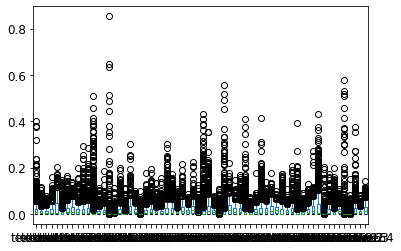

In [22]:
# Extract only texture feature
texture_df = train_set.iloc[:, 128:]
texture_df.boxplot(grid=False)

### Explore transformation

We will use simple technics as base for our pipeline. Standard Scaller in one of them. 

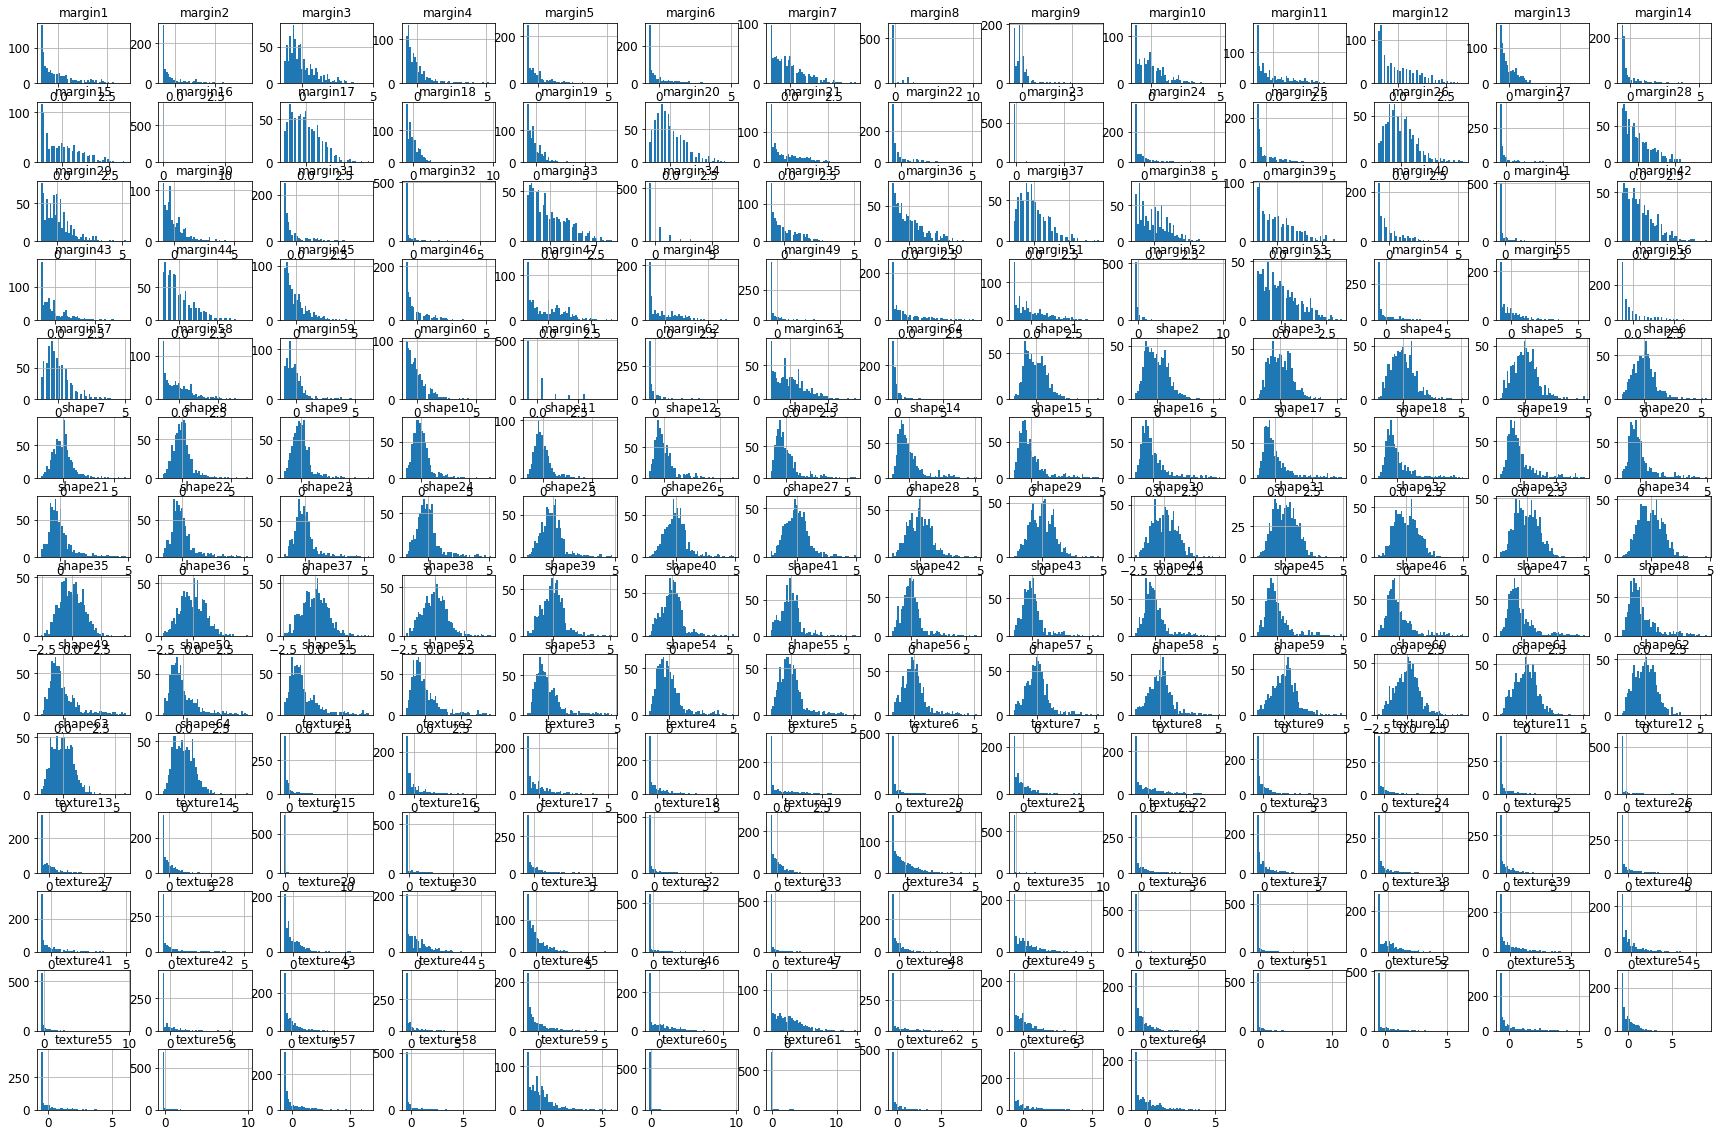

In [23]:
# See impact of standard scaler on the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set.to_numpy())

train_set_scaled = pd.DataFrame(train_set_scaled, columns=list(train_set.columns))
train_set_scaled.describe()

train_set_scaled.hist(bins=50, figsize=(30,20))
plt.show()
# As expected, there is no modification on the data distribution

In [26]:
train_set_scaled.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,792.000000,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.9200

In [27]:
# Explore random forest to detect outlier. Won't be used in the first iteration of the pipeline.
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=np.random.RandomState(42))
clf.fit(train_set)

detection = clf.predict(train_set)
print(detection.shape)
print(detection)

(792,)
[ 1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  